In [5]:
!pip install psycopg2-binary

     |████████████████████████████████| 2.9MB 41kB/s eta 0:00:018


In [331]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import numpy as np
from random import randint

In [332]:
plt.style.use(["Solarize_Light2"])
plt.rcParams["axes.edgecolor"] = "#66818c"
plt.rcParams["axes.facecolor"] = "#263238"
plt.rcParams["figure.facecolor"] = "#263238"
plt.rcParams["grid.color"] = "#3f575b"
plt.rcParams["xtick.color"] = "#bfd5dd"
plt.rcParams["ytick.color"] = "#bfd5dd"
plt.rcParams["text.color"] = "#bfd5dd"
plt.rcParams["axes.labelcolor"] = "#bfd5dd"

In [3]:
engine = create_engine("postgresql+psycopg2://{}:{}@{}:{}/{}".format())
table_name = "flat"

In [759]:
query = """ SELECT material,
                   price,
                   garbage_chute,
                   type,
                   floors,
                   balconies,
                   heating_type,
                   area,
                   area_kitchen,
                   area_living,
                   floor,
                   rooms,
                   layout,
                   height,
                   bathrooms,
                   window_types,
                   condition
            FROM {}
            INNER JOIN building ON flat.building_id = building.id
        """.format(table_name)
df = pd.read_sql(query, engine)
df.loc[:, "ppm"] = df.price / df.area
df.drop("price", axis=True, inplace=True)

In [343]:
df

material  type  floors garbage_chute  heating_type   area  \
0           2.0   1.0      20          True           0.0  71.40   
1           2.0   1.0      15         False           0.0  54.00   
2           3.0   0.0      15          None           NaN  39.40   
3           2.0   1.0      17          True           3.0  60.90   
4           2.0   1.0      17          True           0.0  34.00   
...         ...   ...     ...           ...           ...    ...   
16693       0.0   1.0       6          None           0.0  82.50   
16694       2.0   0.0       9          None           NaN  67.00   
16695       2.0   0.0      12          None           NaN  39.47   
16696       2.0   0.0      39          None           NaN  25.20   
16697       2.0   0.0      39          None           NaN  27.10   

       area_kitchen  area_living  floor  rooms  layout  height bathrooms  \
0               NaN          NaN      2      1     NaN     NaN      None   
1               4.0         50.0      4      1     NaN    3.00      None   
2              19.6         11.2     10      1     NaN    2.65    [1, 0]   
3               NaN          NaN      5      2     1.0     NaN    [1, 0]   
4               9.0         17.0     14      1     NaN    2.75    [1, 0]   
...             ...          ...    ...    ...     ...     ...       ...   
16693           6.5         62.0      3      4     1.0     NaN    [0, 1]   
16694          27.0         30.0      2      2     NaN     NaN      None   
16695          11.2         16.1     15      1     NaN    3.00    [1, 0]   
16696           NaN          NaN     12      1     NaN    2.95    [1, 0]   
16697           NaN          NaN     19      1     NaN    2.95    [1, 0]   

      window_types balconies  condition            ppm  
0           [1, 0]    [1, 0]        0.0  476190.476190  
1           [1, 0]      None        3.0  161111.111111  
2           [1, 0]      None        NaN  156800.000000  
3           [0, 1]      None        0.0  146141.215107  
4           [1, 0]    [0, 1]        1.0  163235.294118  
...            ...       ...        ...            ...  
16693       [1, 1]    [1, 0]        1.0  266666.666667  
16694         None      None        NaN  328208.955224  
16695         None    [0, 1]        NaN  299109.982265  
16696         None      None        NaN  208579.087302  
16697         None      None        NaN  200136.494465  

[16698 rows x 17 columns]

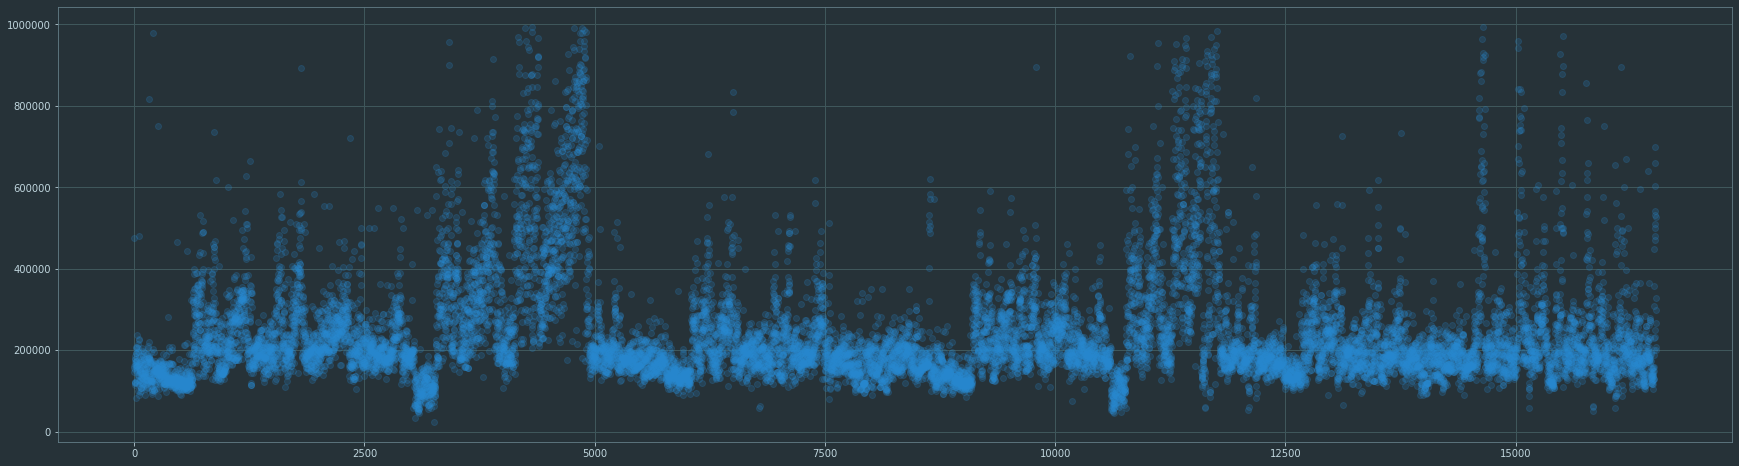

In [387]:
# df.area.describe()
df2 = df[df.ppm < 1e+6]
plt.figure(figsize=(30, 8))
plt.scatter(range(len(df2.ppm)), df2.ppm, alpha=.2)

In [368]:
# df.area.describe()
df2 = df[(df.area > 30) & (df.area < 100)]
plt.figure(figsize=(30, 8))
plt.scatter(df2.area, df2.ppm, alpha=.2)

In [409]:
# df.area.describe()
df2 = df[(df.area_kitchen > 10) & (df.area_kitchen < 50)]
plt.figure(figsize=(30, 8))
plt.scatter(df2.area_kitchen//, df2.ppm, alpha=.2)

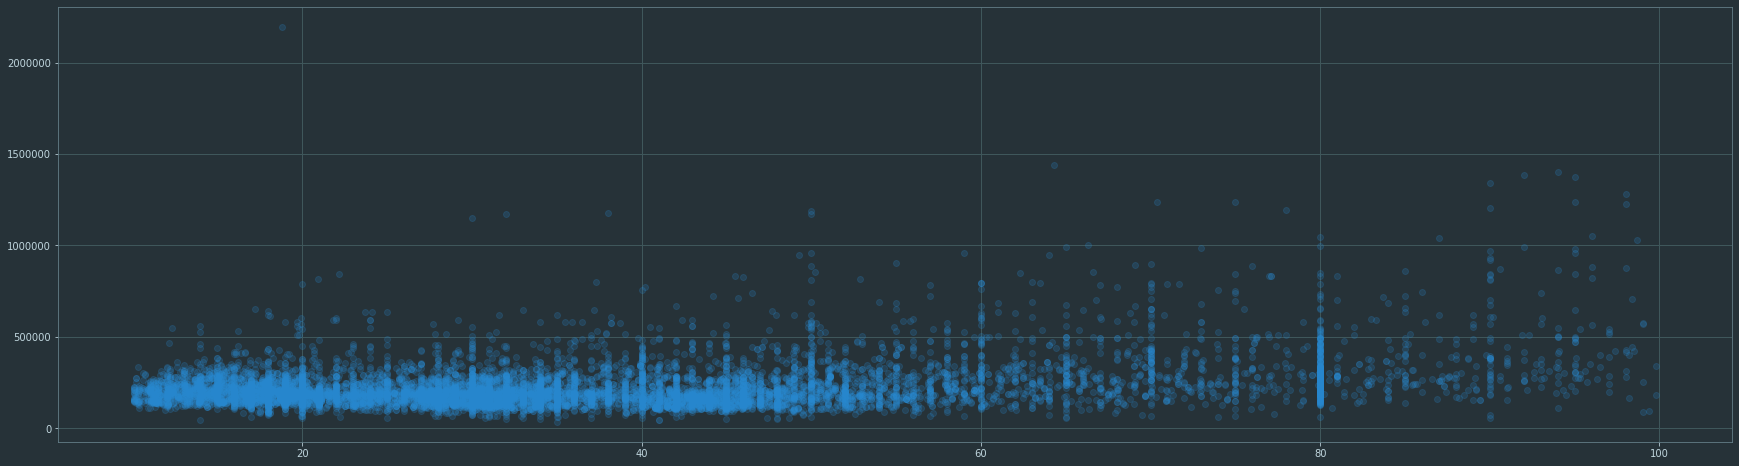

In [411]:
# df.area.describe()
df2 = df[(df.area_living > 10) & (df.area_living < 100)]
plt.figure(figsize=(30, 8))
plt.scatter(df2.area_living, df2.ppm, alpha=.2)

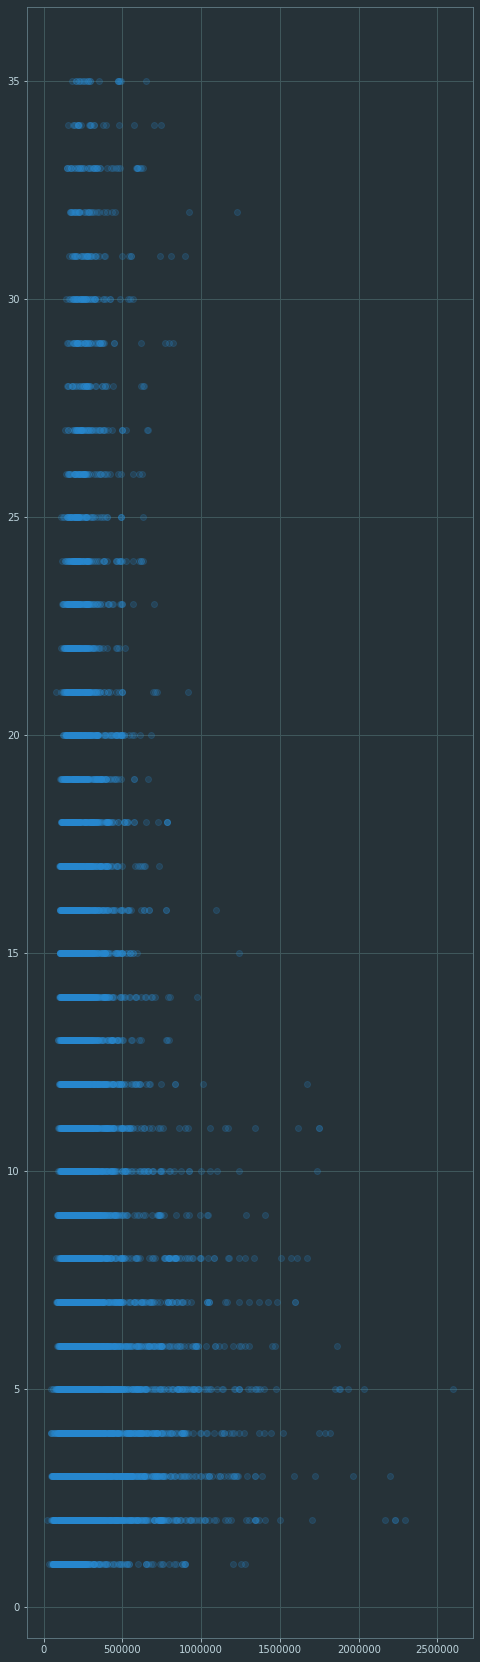

In [15]:
df2 = df[(df.ppm < 2.716761e+06) & (df.floor < 36)]
plt.figure(figsize=(8, 30))
plt.scatter(df2.ppm, df2.floor, alpha=.2)

In [21]:
df2 = df[(df.ppm < 2.716761e+06)]
plt.figure(figsize=(8, 10))
plt.scatter(df2.ppm, df2.rooms, alpha=.2)

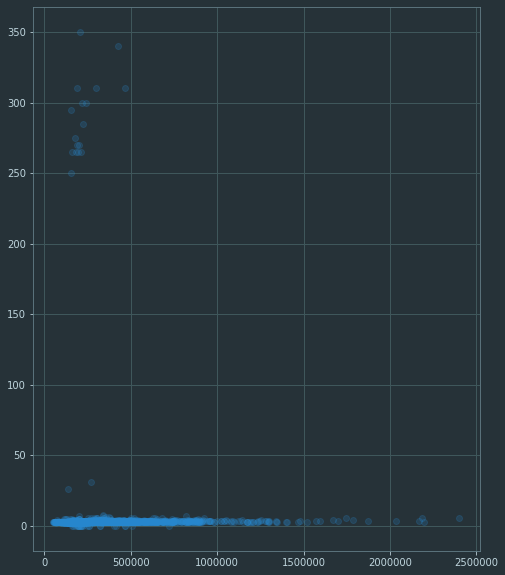

In [22]:
df2 = df[(df.ppm < 2.716761e+06)]
plt.figure(figsize=(8, 10))
plt.scatter(df2.ppm, df2.height, alpha=.2)

In [23]:
df2 = df[(df.ppm < 2.716761e+06)]
plt.figure(figsize=(8, 10))
plt.scatter(df2.ppm, df2.condition, alpha=.2)

In [760]:
df.loc[:, "garbage_chute_true"] = df.garbage_chute.apply(lambda i: 1 if i == True else 0)
df.loc[:, "garbage_chute_false"] = df.garbage_chute.apply(lambda i: 1 if i == False else 0)
df.drop("garbage_chute", axis=True, inplace=True)

df.loc[:, "window_yard"] = df.window_types.apply(lambda i: None if i is None else i[0])
df.loc[:, "window_street"] = df.window_types.apply(lambda i: None if i is None else i[1])
df.drop("window_types", axis=True, inplace=True)
df.loc[:, "window_yard"] = df.window_yard.fillna(0)
df.loc[:, "window_street"] = df.window_street.fillna(0)


df.loc[:, "balcony"] = df.balconies.apply(lambda i: None if i is None else i[0])
df.loc[:, "loggia"] = df.balconies.apply(lambda i: None if i is None else i[1])
df.loc[:, "balcony"] = df.balcony.fillna(0)
df.loc[:, "loggia"] = df.loggia.fillna(0)
df.drop("balconies", axis=True, inplace=True)

df.loc[:, "bathrooms_combined"] = df.bathrooms.apply(lambda i: None if i is None else i[0])
df.loc[:, "bathrooms_separated"] = df.bathrooms.apply(lambda i: None if i is None else i[1])
df.drop("bathrooms", axis=True, inplace=True)
df.loc[:, "bathrooms_combined"] = df.bathrooms_combined.fillna(0)
df.loc[:, "bathrooms_separated"] = df.bathrooms_separated.fillna(0)

In [761]:
for rooms in df.rooms.unique():
    df.loc[df.rooms == rooms, "rooms_"+str(rooms)] = 1
    df["rooms_"+str(rooms)] = df["rooms_"+str(rooms)].fillna(0)
df.drop("rooms", axis=True, inplace=True)
for condition in df.condition.unique():
    df.loc[df.condition == condition, "condition_"+str(condition)] = 1
    df["condition_"+str(condition)] = df["condition_"+str(condition)].fillna(0)
df.drop(["condition", "condition_nan"], axis=True, inplace=True)

for material in df.material.unique():
    df.loc[df.material == material, "material_"+str(material)] = 1
    df["material_"+str(material)] = df["material_"+str(material)].fillna(0)
df.drop(["material"], axis=True, inplace=True)

for type_ in df.type.unique():
    df.loc[df.type == type_, "type_"+str(type_)] = 1
    df["type_"+str(type_)] = df["type_"+str(type_)].fillna(0)
df.drop(["type"], axis=True, inplace=True)

for layout in df.layout.unique():
    df.loc[df.layout == layout, "layout_"+str(layout)] = 1
    df["layout_"+str(layout)] = df["layout_"+str(layout)].fillna(0)
df.drop(["layout"], axis=True, inplace=True)

for heating_type in df.heating_type.unique():
    df.loc[df.heating_type == heating_type, "heating_type_"+str(heating_type)] = 1
    df["heating_type_"+str(heating_type)] = df["heating_type_"+str(heating_type)].fillna(0)
df.drop(["heating_type", "heating_type_nan"], axis=True, inplace=True)

# for floor in df.floor.unique():
#     df.loc[df.floor == floor, "floor_"+str(floor)] = 1
#     df["floor_"+str(floor)] = df["floor_"+str(floor)].fillna(0)
# df.drop(["floor"], axis=True, inplace=True)

In [762]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16698 entries, 0 to 16697
Data columns (total 44 columns):
floors                 16698 non-null int64
area                   16698 non-null float64
area_kitchen           12884 non-null float64
area_living            13428 non-null float64
floor                  16698 non-null int64
height                 7973 non-null float64
ppm                    16698 non-null float64
garbage_chute_true     16698 non-null int64
garbage_chute_false    16698 non-null int64
window_yard            16698 non-null float64
window_street          16698 non-null float64
balcony                16698 non-null float64
loggia                 16698 non-null float64
bathrooms_combined     16698 non-null float64
bathrooms_separated    16698 non-null float64
rooms_1                16698 non-null float64
rooms_2                16698 non-null float64
rooms_3                16698 non-null float64
rooms_4                16698 non-null float64
rooms_5                166

In [813]:
df = df[~df.height.isnull() & ~df.area_living.isnull() & ~df.area_living.isnull() & ~df.area_kitchen.isnull() & (df.height < 4) &\
         (df.ppm < 1e+6)]

In [753]:
# df.drop(["layout_nan"], axis=True, inplace=True)
df.bathrooms

1          None
2        [1, 0]
4        [1, 0]
5        [0, 2]
7        [0, 2]
          ...  
16678    [0, 1]
16679    [0, 1]
16681    [1, 0]
16686    [2, 0]
16695    [1, 0]
Name: bathrooms, Length: 6900, dtype: object

In [824]:
# df.drop(["material_nan", "type_nan", "layout_nan", "heating_type_2.0"], axis=True, inplace=True)
# df.drop(["heating_type_1.0"], axis=True, inplace=True)
# df.drop(["heating_type_0.0"], axis=True, inplace=True)
# df.drop(["material_6.0", "material_7.0", "material_0.0"], axis=True, inplace=True)
df.drop(["material_1.0"], axis=True, inplace=True)
# df.drop(["layout_0.0"], axis=True, inplace=True)

In [825]:
# df = df.loc[:, (df.corr()>.7).columns]
# df.info()
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True);
# plt.figure(figsize=(16, 9))
# plt.scatter(df.loc[:, "price"], df.loc[:, "height"])

In [826]:
X = df.copy()
# X = (X - X.mean())/X.std()
y = df.ppm
X.drop("ppm", axis=True, inplace=True)
# X = X.values

In [827]:
X = ((X-X.mean())/X.std()).values
y = ((y-y.mean())/y.std()).values

In [828]:
XX = X.T.dot(X)
w = np.linalg.inv(XX).dot(X.T).dot(y)
w

array([-0.03546709,  0.32615834,  0.00915243,  0.05825249,  0.06657804,
        0.25817287,  0.00978615,  0.01383316, -0.01902395,  0.0162291 ,
        0.00117312, -0.07716825,  0.06493318, -0.01898619,  0.12004043,
        0.0178953 , -0.06716382, -0.05680962, -0.04392276, -0.05510299,
       -0.01635706,  0.24733872,  0.03299732,  0.06655373, -0.03908185,
       -0.0872881 , -0.02434811, -0.10357425, -0.17240118, -0.04454594,
        0.00494404])

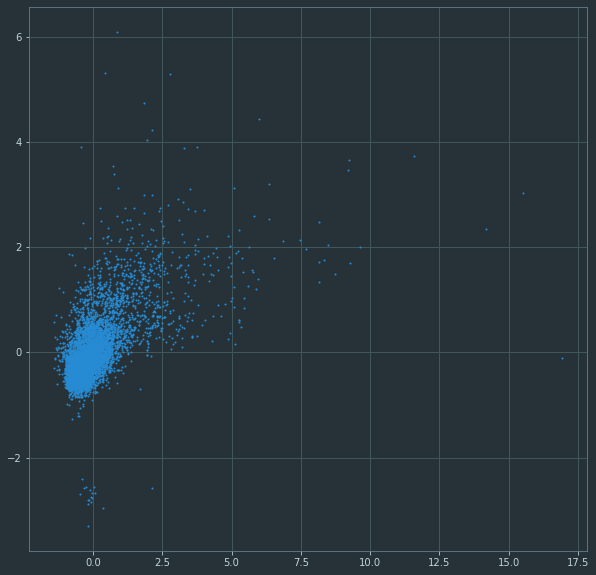

In [829]:
plt.figure(figsize=(10, 10))
plt.scatter(y, X.dot(w), s=1)

-0.11197858496492452


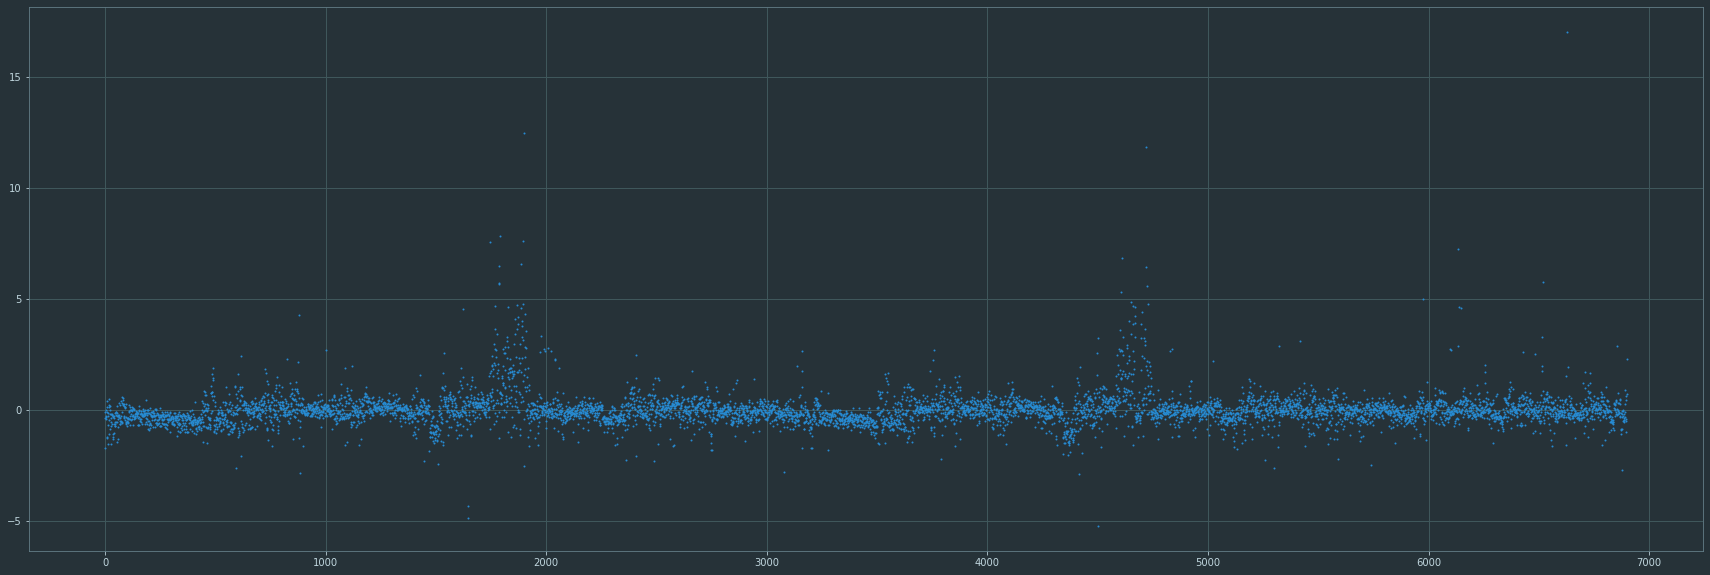

In [830]:
print(y[10])
plt.figure(figsize=(30, 10))
plt.scatter(range(len(y)), y-X.dot(w), s=1)

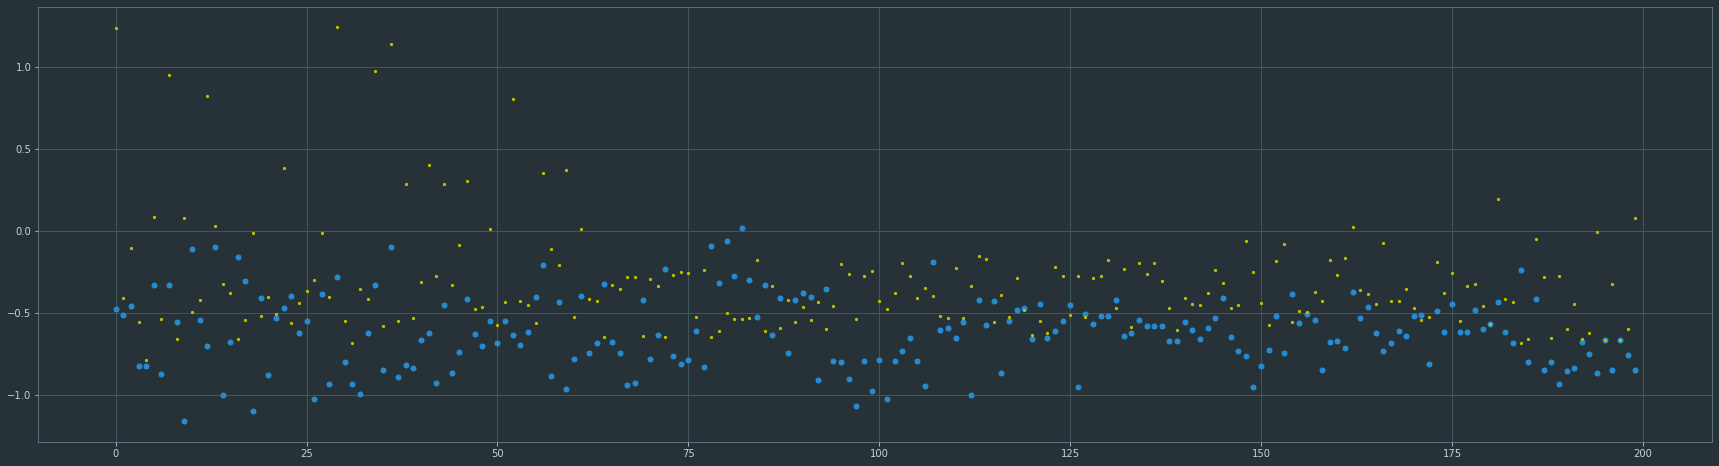

In [831]:
plt.figure(figsize=(30, 8))
plt.scatter(range(len(y[:200])), y[:200], s=25)
plt.scatter(range(len(y[:200])), X.dot(w)[:200], s=5, c="y")

In [832]:
# 0.5289425380060495
# 0.5393108447099378
sum((X.dot(w)-y)**2)/len(y)



0.6189050115391962